In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.datasets import fetch_california_housing
import pandas as pd

housing = fetch_california_housing()
#housing= pd.read_csv("california_housing.csv")
print(housing.keys())



dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [2]:
# data frame
df=pd.DataFrame(housing.data,columns=housing.feature_names)
X = df[['MedInc', 'HouseAge', 'AveRooms']]
print(X.head())
y=housing.target
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=42
)

   MedInc  HouseAge  AveRooms
0  8.3252      41.0  6.984127
1  8.3014      21.0  6.238137
2  7.2574      52.0  8.288136
3  5.6431      52.0  5.817352
4  3.8462      52.0  6.281853


In [3]:
def linear_regression_analytic(X, y):

    XTX = X.T @ X
    XTX_inv = np.linalg.inv(XTX)
    
    # Calcul de X^T y
    XTy = X.T @ y
    
    w = XTX_inv @ XTy
    
    return w


In [4]:
#on va les utiliser pour prédir la valeur de y pour X_test 
X_test_bias = np.hstack([np.ones((X_test.shape[0], 1)), X_test.to_numpy()])
y_pred = X_test_bias @ w_linear
print("Premières prédictions :", y_pred[:5]) 

NameError: name 'w_linear' is not defined

In [5]:
def mse(y_true, y_pred):
    n = len(y_true)
    return (1/n) * np.sum((y_true - y_pred)**2)
california = fetch_california_housing()
X_full = california.data
y = california.target
feature_names = california.feature_names

print(f"Shape complète : X={X_full.shape}, y={y.shape}")
print(f"Features disponibles : {feature_names}\n")
selected_features = [0, 1, 2]  # MedInc, HouseAge, AveRooms
selected_names = ['MedInc', 'HouseAge', 'AveRooms']

X_selected = X_full[:, selected_features]

X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

# Ajouter une colonne de 1 pour le biais (w0)
X_train_bias = np.c_[np.ones(X_train.shape[0]), X_train]
X_test_bias = np.c_[np.ones(X_test.shape[0]), X_test]

print(f"Ensemble d'entraînement : {X_train_bias.shape}")
print(f"Ensemble de test : {X_test_bias.shape}\n")

Shape complète : X=(20640, 8), y=(20640,)
Features disponibles : ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

Ensemble d'entraînement : (16512, 4)
Ensemble de test : (4128, 4)



In [6]:
w = linear_regression_analytic(X_train_bias, y_train)
print(w)
def predict_linear(X, w):
    return X @ w


[ 0.01729565  0.4447578   0.01683623 -0.02814968]


In [58]:
y_pred = predict_linear(X_test_bias, w)
print(f"Shape des prédictions : {y_pred.shape}")
print(f"Premières prédictions : {y_pred[:5]}")
print(f"Vraies valeurs        : {y_test[:5]}\n")

Shape des prédictions : (4128,)
Premières prédictions : [1.06791912 1.50634095 2.32862562 2.68184955 2.09182437]
Vraies valeurs        : [0.477   0.458   5.00001 2.186   2.78   ]



In [60]:
mse_test = mse(y_test, y_pred)
print(mse_test)

0.6589108649336335


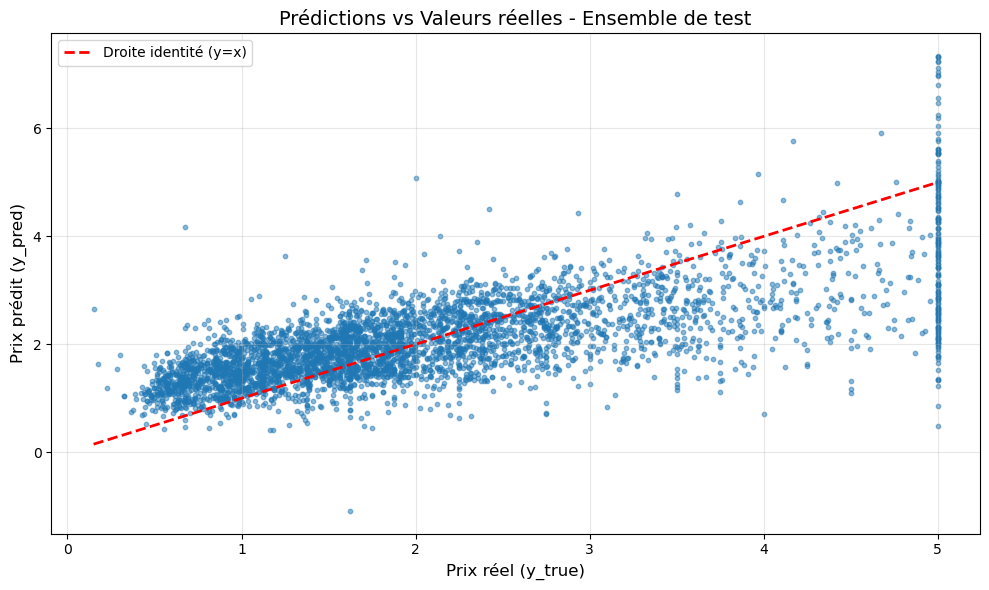

In [63]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, s=10)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Droite identité (y=x)')
plt.xlabel('Prix réel (y_true)', fontsize=12)
plt.ylabel('Prix prédit (y_pred)', fontsize=12)
plt.title('Prédictions vs Valeurs réelles - Ensemble de test', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



6. Interpretation des coefficients

In [71]:
print("Interprétation :")
print("- Points proches de la droite rouge : bonnes prédictions")
print("- Points dispersés : erreurs de prédiction importantes")
print("- Points au-dessus de la droite : surestimation du prix")
print("- Points en-dessous de la droite : sous-estimation du prix\n")

Interprétation :
- Points proches de la droite rouge : bonnes prédictions
- Points dispersés : erreurs de prédiction importantes
- Points au-dessus de la droite : surestimation du prix
- Points en-dessous de la droite : sous-estimation du prix



In [69]:
from sklearn.linear_model import LinearRegression
model_sklearn = LinearRegression()
model_sklearn.fit(X_train, y_train)
y_pred_sklearn = model_sklearn.predict(X_test)
mse_sklearn = mse(y_test, y_pred_sklearn)
mse_manual = mse_test
print("Coefficients sklearn :", model_sklearn.coef_)
print("Intercept sklearn :", model_sklearn.intercept_)

print("Coefficients manuels :", w[1:]) 
print("Intercept manuel :", w[0])
print("MSE sklearn :", mse_sklearn)
print("MSE manuel :", mse_manual)


Coefficients sklearn : [ 0.4447578   0.01683623 -0.02814968]
Intercept sklearn : 0.017295645283370575
Coefficients manuels : [ 0.4447578   0.01683623 -0.02814968]
Intercept manuel : 0.017295645283361694
MSE sklearn : 0.6589108649336336
MSE manuel : 0.6589108649336335


Régression Logistique sur COMPAS

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("compas.csv")
X_log = df.drop(columns=['Two_yr_Recidivism']).values

y_log=df['Two_yr_Recidivism'].values
X_train_log, X_test, y_train_log, y_test = train_test_split(
X_log, y_log, test_size=0.3, random_state=42
)

In [5]:
#question2
def sigmoid(z):
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))
def log_loss(y_true,y_pred):
    epsilon = 1e-15  
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss

In [7]:
import numpy as np

test_z = np.array([-1, 0, 1])
print(f"σ({test_z}) = {sigmoid(test_z)}")

σ([-1  0  1]) = [0.26894142 0.5        0.73105858]


In [8]:
#question3

def logistic_regression_gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    loss_history = []
 
    for epoch in range(epochs):
        z = X @ w  
        y_pred = sigmoid(z)
    
        loss = log_loss(y, y_pred)
        loss_history.append(loss)    
        gradient = (1/n_samples) * X.T @ (y_pred - y)   
        w -= learning_rate * gradient
        if epoch % 100 == 0:
            print(loss)
    return w,loss_history

w, loss_history = logistic_regression_gradient_descent(X_train_log, y_train_log, learning_rate=0.01, epochs=1000)
print( w)

0.6931471805599453
0.6640560374641314
0.6570350044513038
0.6511318041384304
0.6461417892400149
0.6419012576701769
0.6382790613783246
0.6351698153649821
0.632488476007288
0.6301660669519092
[ 0.10086703  0.18621605 -0.35311036  0.09582415 -0.13842999 -0.01430668
 -0.10066279 -0.00199405 -0.08251465 -0.26223241 -0.37518102]


In [9]:
def predict_logistic(X, w, threshold=0.5):
    z = X @ w
    probabilities = sigmoid(z)
    predictions = (probabilities >= threshold).astype(int)
    return predictions

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

y_pred_train = predict_logistic(X_train_log, w)

print(accuracy(y_train_log, y_pred_train))

0.6534722222222222
